In [1]:
options(warn=-1)
library(reshape2)
library(ggplot2)

In [35]:
git.dir='~/Dropbox/mutation_rate/20180705miseq/'
out.dir=paste0(git.dir, 'out/') 
#sample.alignments=readRDS(paste0(out.dir, 'sample.alignments.RDS'))
load(file=paste0(out.dir,'mutation.fil.Rdata'))

In [36]:
mutation.fil

$L1
$L1$`L1:1:chrV:33170:33449`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "33345_T_C" "33313_T_A" "33345_T_A" "33355_T_C" "33416_T_C"
count_vec "8756"      "169"       "169"       "147"       "88"       
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "33214_-_T" "33345_-_T" "33206_-_G" "33207_-_G" "33208_-_G"
count_vec "64"        "121"       "58"        "58"        "58"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "33226_-_T" "33253_-_C" "33345_-_C" "33326_A_C" "33345_A_C"
count_vec "57"        "41"        "41"        "39"        "39"       
          [,16]       [,17]       [,18]       [,19]       [,20]      
id_vec    "33193_C_T" "33194_A_G" "33205_G_A" "33194_C_G" "33345_C_G"
count_vec "34"        "30"        "25"        "24"        "24"       

$L1$`L1:2:chrV:32912:33189`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "33003_C_A" "32946_T_C" "33003_T_C" "33090_C_A" "33091_C_A"
count_vec "4156"      "148"       "148"       "136"       "136"      
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "32960_G_C" "33003_G_C" "33112_C_A" "33117_C_A" "32933_-_T"
count_vec "117"       "117"       "98"        "98"        "88"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "33003_-_T" "33034_C_A" "33019_C_A" "32993_A_T" "33003_A_T"
count_vec "88"        "59"        "52"        "46"        "46"       
          [,16]      
id_vec    "33044_C_A"
count_vec "30"       

$L1$`L1:3:chrV:32664:32931`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "32883_T_C" "32782_T_C" "32795_A_C" "32843_-_A" "32877_C_G"
count_vec "349"       "231"       "163"       "130"       "107"      
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "32799_T_G" "32693_A_C" "32727_-_A" "32842_T_C" "32718_T_A"
count_vec "89"        "71"        "69"        "57"        "54"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "32891_A_G" "32735_G_A" "32798_T_C" "32708_-_C" "32850_C_A"
count_vec "53"        "53"        "48"        "45"        "39"       
          [,16]       [,17]       [,18]       [,19]       [,20]      
id_vec    "32776_A_G" "32777_A_G" "32789_T_C" "32706_-_A" "32877_T_G"
count_vec "36"        "36"        "35"        "33"        "30"       
          [,21]       [,22]       [,23]      
id_vec    "32810_A_C" "32765_-_C" "32900_A_G"
count_vec "28"        "24"        "22"       

$L1$`L1:4:chrV:32510:32722`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "32558_G_C" "32661_T_C" "32572_G_C" "32679_T_C" "32572_T_C"
count_vec "352"       "235"       "223"       "180"       "162"      
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "32638_-_T" "32693_A_C" "32574_A_T" "32610_T_C" "32680_T_C"
count_vec "144"       "134"       "130"       "111"       "99"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "32662_T_C" "32577_-_A" "32695_C_A" "32567_A_C" "32572_A_C"
count_vec "63"        "60"        "54"        "48"        "48"       
          [,16]       [,17]       [,18]       [,19]       [,20]      
id_vec    "32632_-_T" "32537_-_C" "32606_-_A" "32608_-_A" "32576_T_G"
count_vec "40"        "33"        "33"        "33"        "26"       
          [,21]       [,22]       [,23]       [,24]       [,25]      
id_vec    "32625_-_C" "32630_A_C" "32667_C_A" "32539_T_G" "32567_T_C"
count_vec "25"        "25"        "24"        "24"        "23"       
          [,26]       [,27]      
id_vec    "32706_-_A" "32573_T_C"
count_vec "21"        "21"       

$L1$`L1:6:chrV:32019:32308`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "32076_T_C" "32282_-_C" "32254_T_G" "32275_T_G" "32059_C_G"
count_vec "215"       "185"       "173"       

In [37]:
#function
get_replicated_type  =function(s1, s2)
{
  S1 = unlist(mutation.fil[[s1]])
  S1 = S1[seq(1, length(S1),2)]
  S1_rep = unlist(mutation.fil[[s2]])
  S1_rep = S1_rep[seq(1, length(S1_rep),2)]
  S1_common = intersect(S1, S1_rep)
  #S1_common = union(S1, S1_rep)
  
  all_types = unique(
    unlist(lapply(S1_common, function(x) paste0(strsplit(x,"_")[[1]][2:3],collapse="_")
    )
    ))
  all_types = gsub("-", "N", all_types)
  return(list(this_type=all_types, S_common=S1_common))
}

expand_count = function(ID, S_common, count_mat)
{
this_vec = NULL
this_vec$ID = ID
for(j in 2:ncol(count_mat))
  this_vec[[colnames(count_mat)[j]]] = 0

for(i in 1:length(S_common))
{
  this_type = paste0(strsplit(S_common[i],"_")[[1]][2:3], collapse="_")
  this_type = gsub("-", "N", this_type)
  if(length(this_vec[[this_type]])<1)
  {
    this_vec[[this_type]]=1
  } else {
    this_vec[[this_type]] = this_vec[[this_type]] + 1
  }
}

count_mat =rbind.data.frame(count_mat, this_vec, stringsAsFactors=F)
return(count_mat)
}                   

In [38]:
all_types = unlist(mutation.fil)
all_types = all_types[seq(1,length(all_types),2)]
all_types = unique(
  unlist(lapply(all_types, function(x) paste0(strsplit(x,"_")[[1]][2:3],collapse="_")
  )
  ))
all_types = gsub("-", "N", all_types)

count_mat = matrix(nrow=0, ncol=length(all_types)+1)
colnames(count_mat) = c('ID', all_types)
count_mat = as.data.frame(count_mat, stringsAsFactors=F)


There are 8 PCRs to cover the CAN1 region, and 1 of them is missing in this data set (need to go back to the pear step to decrease the required overlap base pair to be 1). So the expected number of observed mutations are 200*(1700-300)/1700=164. From the table below, the observed mutations are a little less, which is fine. Because some segregants may have the same mutations at the same position, and in that case only one will be counted. 

In [39]:
#the code is for replicates, here I did not have replicates, so 
#just rep the mutation.fil to make it compatible for rest codes
mutation.fil = rep(mutation.fil, each = 2)
replicate_mat = matrix(names(mutation.fil), ncol=2, byrow = T)
rownames(replicate_mat) = c('S1', 'S2', 'S3', 'S4')
for(i in 1:nrow(replicate_mat))
{
  this_id = rownames(replicate_mat)[i]
  this = get_replicated_type(replicate_mat[i,1], replicate_mat[i,2])
  count_mat = expand_count(this_id, this$S_common, count_mat)
}


In [40]:
selected_mutation_type = grep("N", colnames(count_mat), invert=T)
count_mat_tmp=count_mat[,selected_mutation_type]
count_mat_new=data.frame(
                         CG_GC = count_mat_tmp$C_G+count_mat_tmp$G_C,
                         CA_GT = count_mat_tmp$C_A+count_mat_tmp$G_T,
                         CT_GA = count_mat_tmp$C_T+count_mat_tmp$G_A,
                         AT_TA = count_mat_tmp$A_T+count_mat_tmp$T_A,
                         AC_TG = count_mat_tmp$A_C+count_mat_tmp$T_G,
                         AG_TC = count_mat_tmp$A_G+count_mat_tmp$T_C
)


In [21]:
count_mat_new

CG_GC,CA_GT,CT_GA,AT_TA,AC_TG,AG_TC
11,11,12,6,22,30
14,21,19,10,29,30
20,26,8,4,20,20
5,20,13,10,25,30


Total number of transitions:

In [23]:
rowSums(count_mat_new[,c(3,6)])

[1] 42 49 28 43

Total number of transversions:

In [24]:
rowSums(count_mat_new[,c(1,2,4,5)])

[1] 50 74 70 60

In [26]:
count_mat_new3 = as.matrix(count_mat_new)

count_effectRAD5 = data.frame(RM = as.vector(count_mat_new3[1,]+count_mat_new3[2,]),
                              BY = as.vector(count_mat_new3[3,]+count_mat_new3[4,]),
                              ID = c("CG_GC", "CA_GT", "CT_GA", "AT_TA","AC_TG","AG_TC") )

## "CG_GC" "CA_GT" "CT_GA" "AT_TA" "AC_TG" "AG_TC"
group_total = as.numeric(colSums(count_effectRAD5[,1:2]))

prop.test(as.numeric(count_effectRAD5[1,1:2]), group_total)
prop.test(as.numeric(count_effectRAD5[2,1:2]), group_total)
prop.test(as.numeric(count_effectRAD5[3,1:2]), group_total)
prop.test(as.numeric(count_effectRAD5[4,1:2]), group_total)
prop.test(as.numeric(count_effectRAD5[5,1:2]), group_total)
prop.test(as.numeric(count_effectRAD5[6,1:2]), group_total)


	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectRAD5[1, 1:2]) out of group_total
X-squared = 0.010607, df = 1, p-value = 0.918
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07550157  0.05930350
sample estimates:
   prop 1    prop 2 
0.1162791 0.1243781 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectRAD5[2, 1:2]) out of group_total
X-squared = 3.8567, df = 1, p-value = 0.04955
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1599073583 -0.0001296659
sample estimates:
   prop 1    prop 2 
0.1488372 0.2288557 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectRAD5[3, 1:2]) out of group_total
X-squared = 1.1565, df = 1, p-value = 0.2822
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.02829401  0.10771088
sample estimates:
   prop 1    prop 2 
0.1441860 0.1044776 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectRAD5[4, 1:2]) out of group_total
X-squared = 2.2151e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04969057  0.05922429
sample estimates:
    prop 1     prop 2 
0.07441860 0.06965174 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectRAD5[5, 1:2]) out of group_total
X-squared = 0.042436, df = 1, p-value = 0.8368
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07243959  0.09909701
sample estimates:
   prop 1    prop 2 
0.2372093 0.2238806 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectRAD5[6, 1:2]) out of group_total
X-squared = 0.3473, df = 1, p-value = 0.5556
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05915327  0.11978037
sample estimates:
   prop 1    prop 2 
0.2790698 0.2487562 


From above test, RAD5 significantly affect C:G > A:T transversions

In [29]:
#MKT1 effect
count_effectMKT1 = data.frame(RM = as.vector(count_mat_new3[1,]+count_mat_new3[3,]),
                              BY = as.vector(count_mat_new3[2,]+count_mat_new3[4,]),
                              ID = c("CG_GC", "CA_GT", "CT_GA", "AT_TA","AC_TG","AG_TC") )

## "CG_GC" "CA_GT" "CT_GA" "AT_TA" "AC_TG" "AG_TC"
group_total = as.numeric(colSums(count_effectMKT1[,1:2]))

prop.test(as.numeric(count_effectMKT1[1,1:2]), group_total)
prop.test(as.numeric(count_effectMKT1[2,1:2]), group_total)
prop.test(as.numeric(count_effectMKT1[3,1:2]), group_total)
prop.test(as.numeric(count_effectMKT1[4,1:2]), group_total)
prop.test(as.numeric(count_effectMKT1[5,1:2]), group_total)
prop.test(as.numeric(count_effectMKT1[6,1:2]), group_total)


	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectMKT1[1, 1:2]) out of group_total
X-squared = 5.3804, df = 1, p-value = 0.02036
alternative hypothesis: two.sided
95 percent confidence interval:
 0.01045124 0.14772296
sample estimates:
   prop 1    prop 2 
0.1631579 0.0840708 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectMKT1[2, 1:2]) out of group_total
X-squared = 0.048688, df = 1, p-value = 0.8254
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06698643  0.09362826
sample estimates:
   prop 1    prop 2 
0.1947368 0.1814159 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectMKT1[3, 1:2]) out of group_total
X-squared = 0.93558, df = 1, p-value = 0.3334
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1041830  0.0315235
sample estimates:
   prop 1    prop 2 
0.1052632 0.1415929 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectMKT1[4, 1:2]) out of group_total
X-squared = 1.4843, df = 1, p-value = 0.2231
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.08948508  0.01775708
sample estimates:
    prop 1     prop 2 
0.05263158 0.08849558 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectMKT1[5, 1:2]) out of group_total
X-squared = 0.098898, df = 1, p-value = 0.7532
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.10379910  0.06802825
sample estimates:
   prop 1    prop 2 
0.2210526 0.2389381 



	2-sample test for equality of proportions with continuity correction

data:  as.numeric(count_effectMKT1[6, 1:2]) out of group_total
X-squared = 1.9253e-30, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.08971658  0.08505892
sample estimates:
   prop 1    prop 2 
0.2631579 0.2654867 


From above test, MKT1 significantly affect C:G > G:C transversions

Using ID as id variables


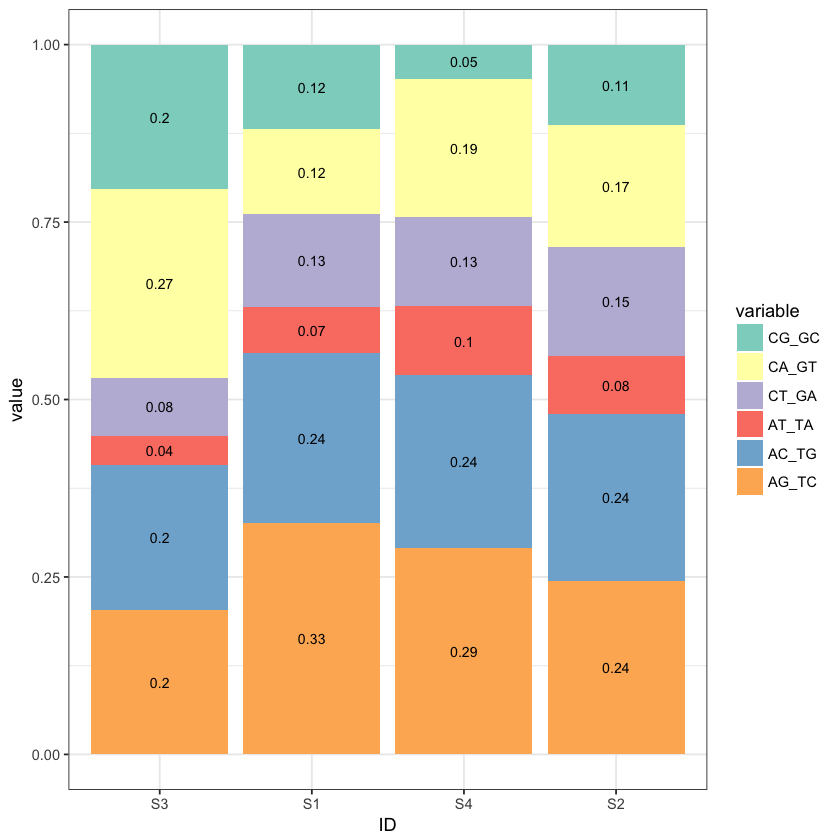

In [44]:
group_total = apply(count_mat_new3, 1, sum)
count_mat_new2 = count_mat_new/group_total
count_mat_new2$ID = count_mat$ID
df = melt(count_mat_new2)

#order x axis by mutation rate from low to high
p=ggplot(data=df, aes(x=ID, y=value, fill=variable)) + geom_bar(stat="identity", position="stack") +
  scale_fill_brewer(palette = "Set3") + scale_x_discrete(limits=c('S3', 'S1', 'S4', 'S2') ) +
  geom_text(aes(label=round(value,2)), size =3, position = position_stack(vjust = 0.5)) +
  theme_bw()
print(p)
